In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("C:/Users/19452/Downloads/Air_line_Delay_Cause.csv")

# Data Preprocessing: Convert categorical variables to numeric
label_encoder = LabelEncoder()
df['carrier'] = label_encoder.fit_transform(df['carrier'])
df['airport'] = label_encoder.fit_transform(df['airport'])

# Fill any missing values with zero
df.fillna(0, inplace=True)

In [2]:
# Define features (X) and target (y)
features = ['month', 'carrier', 'airport', 'arr_flights', 'arr_cancelled', 'arr_diverted', 
            'arr_delay', 'carrier_ct', 'weather_ct', 'nas_ct']
# Sample a fraction of the dataset
df_sampled = df.sample(frac=0.3, random_state=42)  # Adjust the fraction as needed
X = df_sampled[features]
y = df_sampled['late_aircraft_delay']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier model
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
#conf_matrix = confusion_matrix(y_test, y_pred)
#plt.figure(figsize=(6, 4))
#sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
#plt.title("Confusion Matrix")
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
#plt.show()


Accuracy Score: 0.9620758165779226

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     60582
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         7
        10.0       0.00      0.00      0.00         7
        11.0       0.00      0.00      0.00         7
        12.0       0.00      0.00      0.00         5
        13.0       0.50      0.12      0.20         8
        14.0       0.00      0.00      0.00         6
        15.0       0.00      0.00      0.00         9
        16.0       0.

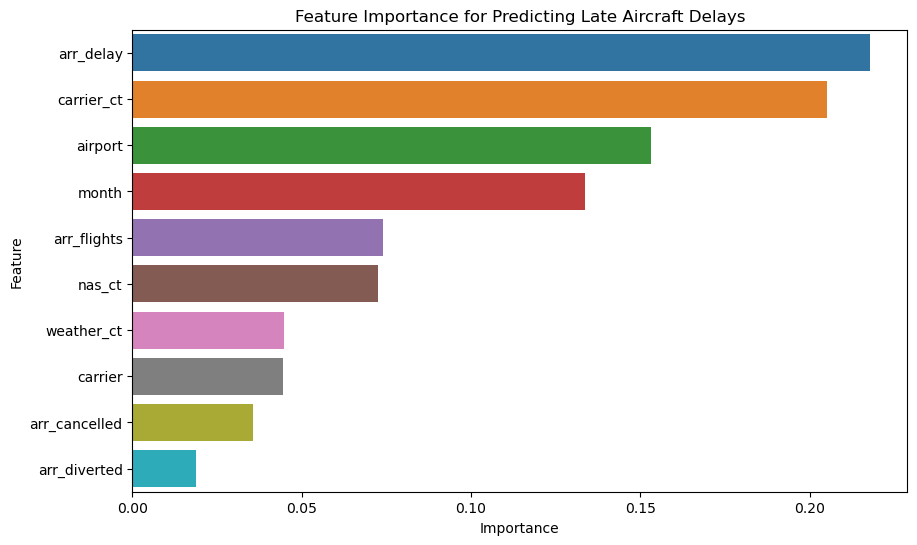

In [3]:
# Extract feature importance
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance for Predicting Late Aircraft Delays")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
